<a href="https://colab.research.google.com/github/tajrink/Cisc_3225/blob/main/CISC_3225.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header


The "Airbnb" dataset contains information about Airbnb listings in New York City. The dataset is available on Kaggle.
link: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

In this project, we'll be working with the AirBnb Bookings dataset where we'll first start with getting to know what Airbnb is. AirBnb is an online platform where users can find homes or rooms to rent for a day or week. Hosts list their property on Airbnb, the prices, availability and other data that is necessary to inform the users before they decide to rent that particular property. Basically, they provide a platform and a network of people that include hosts and users worldwide for best travel experiences or finding places to rent.

Now for knowing the dataset, we'll be starting with getting to know the data and describe it, check for variables and their correlations and how they're related to each other. We'll work with the null values, the values that are odd which are statistically termed as 'Outliers'. Also, finding out the most popular places, their prices and what the users prefer most when booking on Airbnb.

We'll also be visualising all our findings and give it a visual representation for more clarity in the information

In [ ]:
#import library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats



In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/tajrink/Cisc_3225/main/AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.shape

(48895, 16)


Our dataset has 48895 data and 16 columns. 

id : a unique id identifying an airbnb lisitng

name : name representating the accomodation

host_id : a unique id identifying an airbnb host

host_name : name under whom host is registered

neighbourhood_group : a group of area

beighbourhood : area falls under neighbourhood_group

latitude : coordinate of listing

longitude : coordinate of listing

room_type : type to categorize listing rooms

price : price of listing

minimum_nights : the minimum nights required to stay in a single visit

number_of_reviews : total count of reviews given by visitors

last_review : date of last review given

reviews_per_month : rate of reviews given per month

calculated_host_listings_count : total no of listing registered under the host

availability_365 : the number of days for which a host is available in a year.

# EDA

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


The categorical variables in this dataset are:

Host Id

Neighbourhood group

Neighbourhood

Room type

The continuous variables in this dataset are:

Price

Minimum nights

Number of reviews

Availability 365

Latitude

Longitude

In [ ]:
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category')
df['neighbourhood'] = df['neighbourhood'].astype('category')
df['room_type'] = df['room_type'].astype('category')
df['host_id']=df['host_id'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  category
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  category
 5   neighbourhood                   48895 non-null  category
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  category
 9   price                           48895 non-null  int64   
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_review       

In [ ]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Here are some observations from the output:

'price': The minimum price is 0, which seems strange, and the maximum price is 10,000, which is significantly higher than the 75th percentile. It also has high standard deviation.

'minimum_nights': The maximum value is 1,250, which is much higher than the 75th percentile.

'number_of_reviews': The maximum value is 629, which is much higher than the 75th percentile.

'reviews_per_month': The maximum value is 58.5, which is much higher than the 75th percentile.

'calculated_host_listings_count': The maximum value is 327, which is much higher than the 75th percentile.

All these factors indicate that there may be outliers in these columns.

In [ ]:
#zero price
zero_price=df[df['price'] == 0]
zero_price.groupby(['neighbourhood_group','room_type']).size()

neighbourhood_group  room_type      
Bronx                Entire home/apt    0
                     Private room       1
                     Shared room        0
Brooklyn             Entire home/apt    1
                     Private room       6
                     Shared room        2
Manhattan            Entire home/apt    1
                     Private room       0
                     Shared room        0
Queens               Entire home/apt    0
                     Private room       0
                     Shared room        0
Staten Island        Entire home/apt    0
                     Private room       0
                     Shared room        0
dtype: int64

Observation :

there is 1 entire home/apt in Manhattan 

1 private room in the Bronx

1 entire home/apt ,6 private room and 2 shared room in Brooklyn

total =11 house listed as zero price .
 
 Sure a good deal !lol

In [ ]:
df.describe(include='category')

,host_id,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895,48895
unique,37457,5,221,3
top,219517861,Manhattan,Williamsburg,Entire home/apt
freq,327,21661,3920,25409


 Observation:

 Manhattan is the most preferred neighbourhood_group.

 Williamsburg is the most preferred neighbourhood.

 Entire home/apt is the most preferred room_type.

In [ ]:

df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

we can see that columns like "neighbourhood_group","room_type" have very few unique values, which means that our dataset can be divided or segregated on the basis of this column in our analysis.

In [ ]:
df.neighbourhood_group.unique().tolist()

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

In [ ]:
df.room_type.unique().tolist()

['Private room', 'Entire home/apt', 'Shared room']

# Data wrangling

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Columns with missing values :

name -                           16

host_name -                        21

last_review   -               10052

reviews_per_month   -              10052

<Axes: >

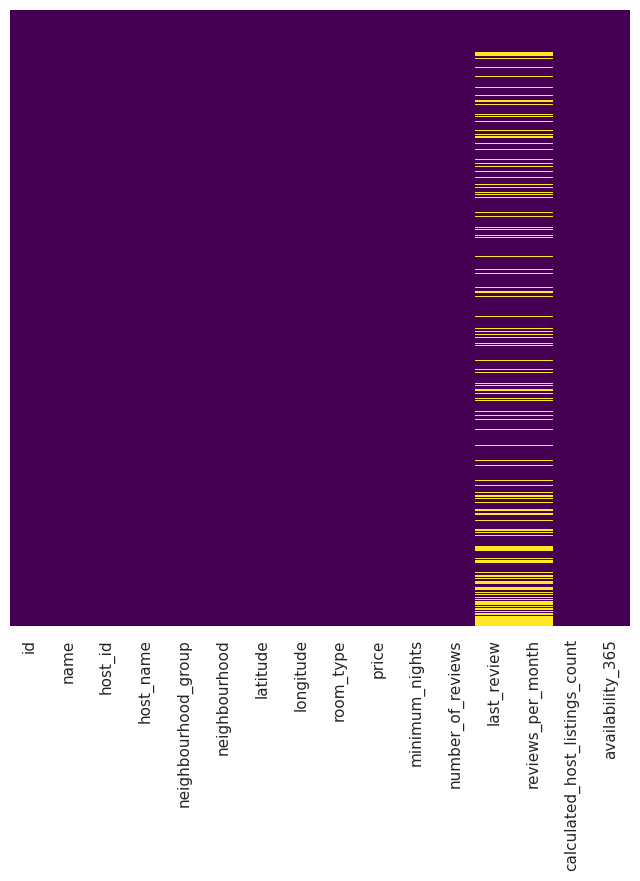

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [ ]:
# Percent of rows missing a data value
len(df[df.isna().any(axis=1)]) / len(df)

0.20603333674199817

# Ethical Audit


In terms of missing data, it is necessary to account for any missing values and their potential impact on the analysis. Missing data can affect the representativeness and generalizability of the findings. It is important to identify which variables have missing values and understand any patterns or biases associated with the missingness. This information should be disclosed when presenting the results to ensure transparency and accuracy.

In [ ]:
df['calculated_host_listings_count'].mean()

7.143982002249719

In [ ]:
df.groupby('neighbourhood_group')['calculated_host_listings_count'].mean()

neighbourhood_group
Bronx             2.233731
Brooklyn          2.284371
Manhattan        12.791330
Queens            4.060184
Staten Island     2.319035
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#neighbourhood_group count
n_count=df['neighbourhood_group'].value_counts()
n_count

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# What percentage of data is missing from each neighbourhood_group
df[df.isna().any(axis=1)].groupby('neighbourhood_group')['calculated_host_listings_count'].count() / n_count

Bronx            0.197984
Brooklyn         0.182302
Manhattan        0.232676
Queens           0.193082
Staten Island    0.158177
dtype: float64

In [ ]:
df.groupby('room_type')['calculated_host_listings_count'].mean()

room_type
Entire home/apt    10.698335
Private room        3.227717
Shared room         4.662931
Name: calculated_host_listings_count, dtype: float64

In [ ]:
#room type count
r_count=df['room_type'].value_counts()
r_count

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [ ]:
# What percentage of data is missing from each room type
df[df.isna().any(axis=1)].groupby('room_type')['calculated_host_listings_count'].count() / r_count

room_type
Entire home/apt    0.200244
Private room       0.209263
Shared room        0.270690
dtype: float64

It is important to note that the dataset may not capture the complete picture of the Airbnb market, as it relies on voluntarily provided information from hosts and users. This means that some information may be incomplete or inaccurate, and certain aspects of the rental properties and host behavior may not be fully represented.

Due to ethical considerations, we should always strive to avoid using any person or entity names in our data analysis; hence, we will be removing the "name" and "Host_name" columns.'id ' is irrelevant also
last_review irrelevant with missing values 

In [ ]:
df.drop(['id', 'host_name','name','last_review'], axis=1, inplace=True)

reviews_per_month has missing values of 10052 which means a listing has never received a review, its possible and valid. So we just fillna(0) to those null values.

In [ ]:
df.fillna({'reviews_per_month' : 0}, inplace = True)

From our initial observation we saw price has minimum value of zero which means it is either free or mostly a mistake.since it is only 11 of them it is best to remove them from the data frame.

In [ ]:
df=df.drop(df[df['price']==0].index,axis=0)

 "availability_365" means number of days when listing is available for booking. Its means that the total number of days the accommodation operates during the year.Here, a value of 0 means an accommodation that has not been operated for one year, so we will drop such rows 

In [ ]:
df = df.drop(df[df['availability_365']==0].index,axis=0)

In [ ]:
df.shape

(31354, 12)

# Visualization

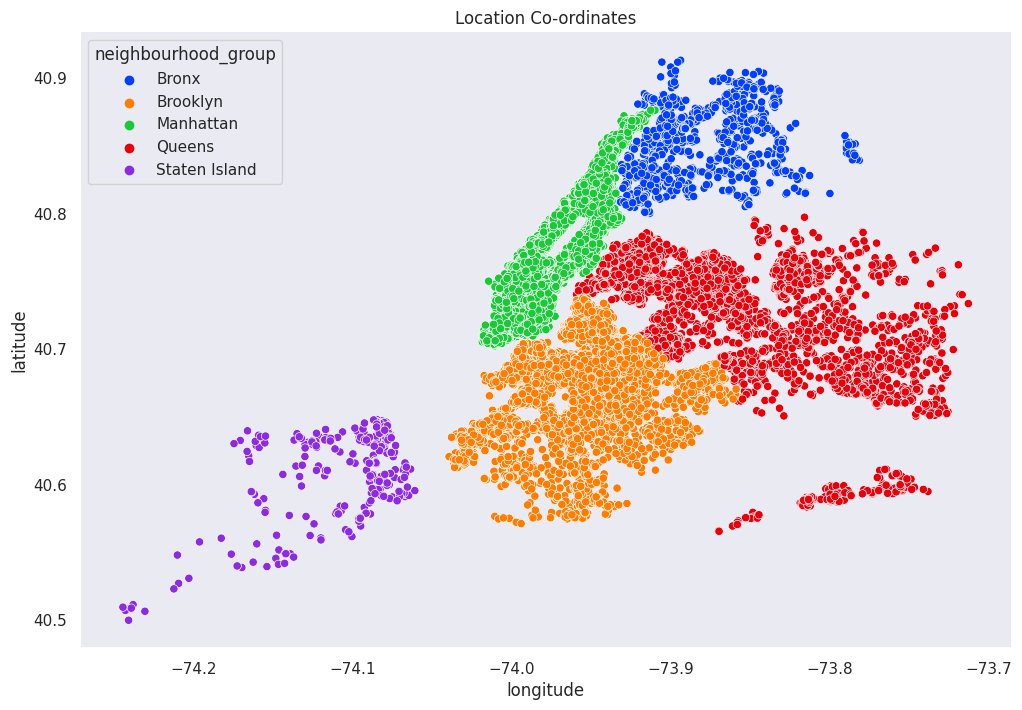

In [ ]:
# Latitude and longitude represents a co-ordinate

plt.figure(figsize=(12,8))
ax = sns.scatterplot(data = df, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')
sns.despine(top=True, right=True, left=True)
plt.grid()

In [ ]:
# Group by neighborhood and count listings
neighborhood_counts=df['neighbourhood_group'].value_counts()
neighborhood_counts

Manhattan        13559
Brooklyn         12253
Queens            4298
Bronx              913
Staten Island      331
Name: neighbourhood_group, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='count'>

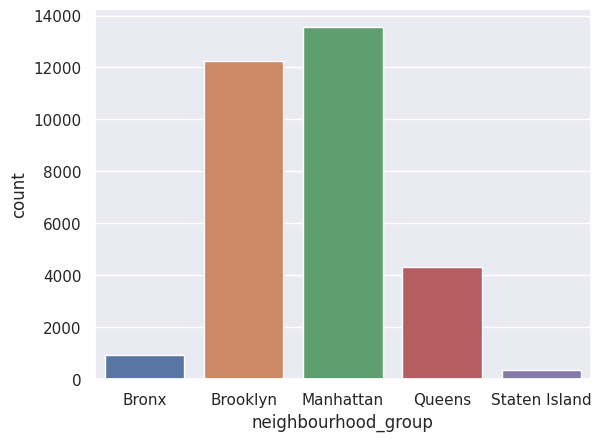

In [ ]:
#countplot
sns.countplot(x='neighbourhood_group',data=df)

In [ ]:
df['room_type'].value_counts()

Entire home/apt    16532
Private room       13960
Shared room          862
Name: room_type, dtype: int64

<Axes: xlabel='room_type', ylabel='count'>

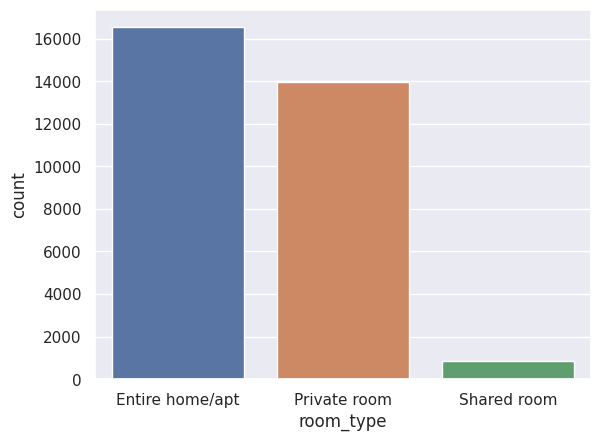

In [ ]:
#countplot
sns.countplot(x='room_type',data=df)

Observations 

Manhattan and Brooklyn have more listings of airbnb

Entire home/apt and private room listings are more common than Shared room 

In [ ]:
df.groupby(['neighbourhood_group','room_type'])['price'].count().sort_values(ascending = False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt    8441
Brooklyn             Entire home/apt    6071
                     Private room       5876
Manhattan            Private room       4782
Queens               Private room       2586
                     Entire home/apt    1550
Bronx                Private room        545
Manhattan            Shared room         336
Bronx                Entire home/apt     318
Brooklyn             Shared room         306
Staten Island        Private room        171
Queens               Shared room         162
Staten Island        Entire home/apt     152
Bronx                Shared room          50
Staten Island        Shared room           8
Name: price, dtype: int64

<Axes: xlabel='neighbourhood_group', ylabel='price'>

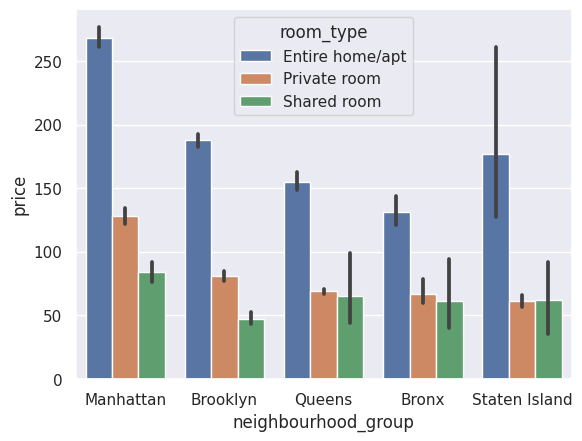

In [ ]:
#bar plot 
sns.barplot(x ='neighbourhood_group',y = 'price' ,hue = 'room_type' ,data = df ,order = df.neighbourhood_group.value_counts().index)


Price for entire home/apt is more through out all 5 boroughs of NYC

In [ ]:
top10_neighbourhoods = df['neighbourhood'].value_counts()[:10]
top10_neighbourhoods

Bedford-Stuyvesant    2478
Williamsburg          2051
Harlem                1734
Bushwick              1447
Hell's Kitchen        1446
Upper East Side       1095
Upper West Side       1089
Midtown               1087
East Village           957
Crown Heights          912
Name: neighbourhood, dtype: int64

<Axes: title={'center': 'Top 10 neighbourhoods with the most listings'}, xlabel='count', ylabel='neighbourhood'>

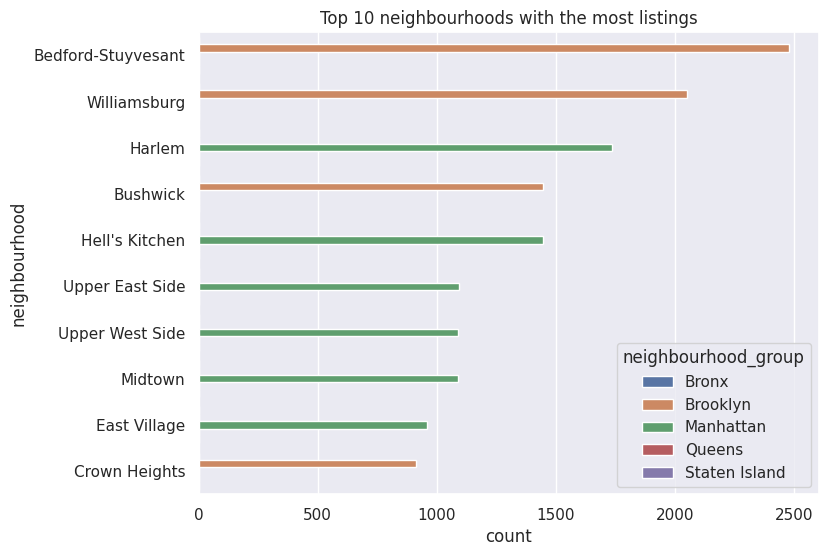

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Top 10 neighbourhoods with the most listings')
sns.countplot(y = df['neighbourhood'], order=df['neighbourhood'].value_counts().index[:10], 
              hue=df['neighbourhood_group']) 


The neighbourhood with the most listings is Williamsburg in Brooklyn. The other top 10 neighbourhoods with the most listings include Bedford-Stuyvesant, Harlem, Bushwich, Upper West Side, Hell's Kitchen, East Village, Upper East Side, Crown Heights, and Midtown. All of them are either in Brooklyn or Manhattan.

<Axes: xlabel='price', ylabel='neighbourhood'>

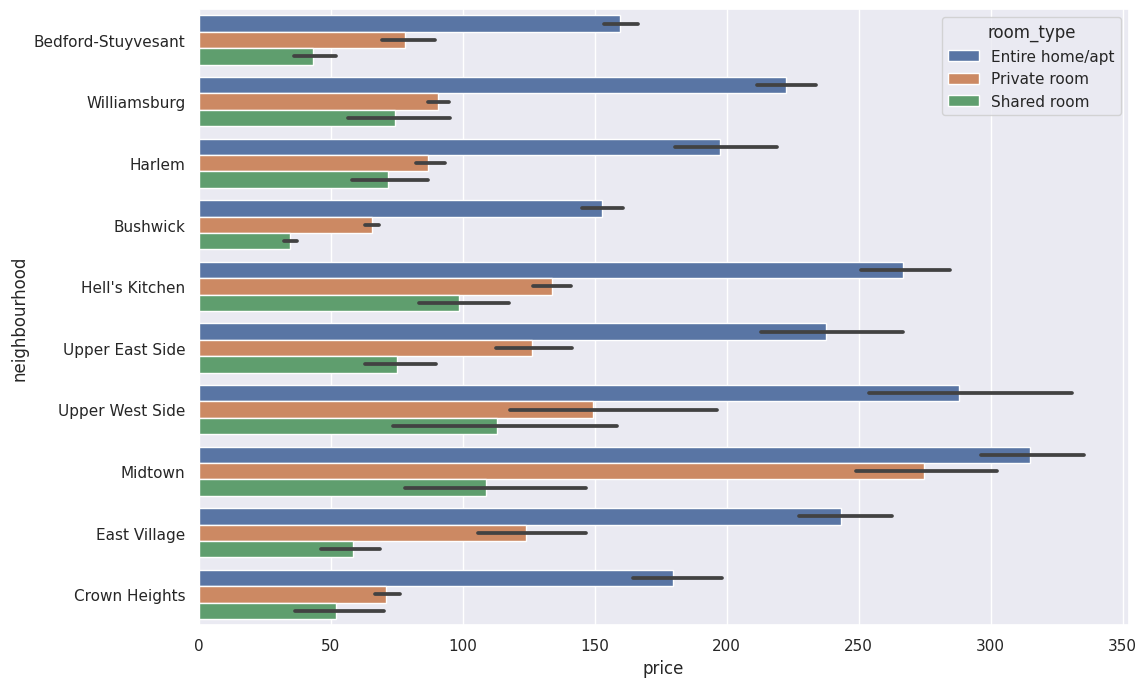

In [ ]:
#bar plot
plt.figure(figsize=(12,8))
sns.barplot(y ='neighbourhood' ,x = 'price' ,hue = 'room_type' ,data = df ,order = df.neighbourhood.value_counts()[:10].index)

<Axes: title={'center': 'Number of listings in each neighbourhood group by room type'}, xlabel='neighbourhood_group', ylabel='count'>

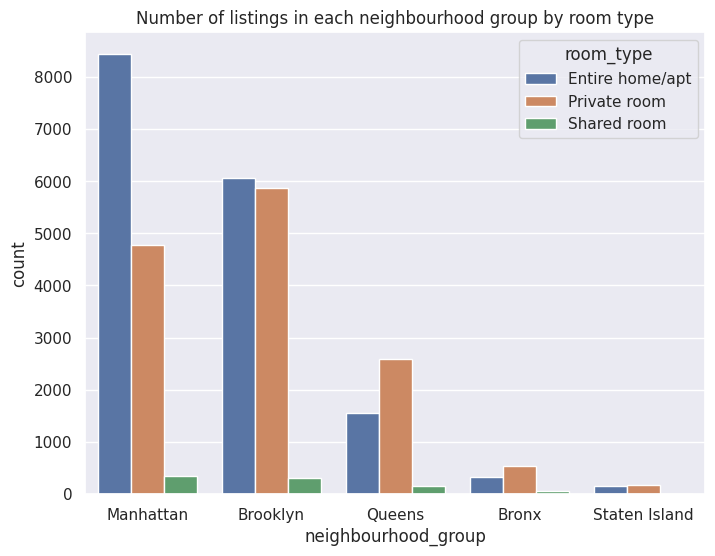

In [ ]:
# Room type by neighbourhood group
plt.figure(figsize=(8,6))
plt.title('Number of listings in each neighbourhood group by room type')
sns.countplot(x=df['neighbourhood_group'], hue=df['room_type'], 
              order=df['neighbourhood_group'].value_counts().index)




Among different neighbourhood groups, Brooklyn has the most private rooms, while Manhattan has the most entire homes/apts.


In [ ]:
#top 10 host 
top_10_host=df['host_id'].value_counts()[:10]
top_10_host

219517861    327
107434423    232
30283594     121
12243051      96
16098958      92
137358866     92
61391963      86
22541573      85
200380610     65
1475015       52
Name: host_id, dtype: int64

In [ ]:
df.groupby(['host_id'])['calculated_host_listings_count'].count().sort_values(ascending = False)

host_id
219517861    327
107434423    232
30283594     121
12243051      96
16098958      92
            ... 
23793668       0
23778946       0
23755490       0
23751556       0
26790498       0
Name: calculated_host_listings_count, Length: 37457, dtype: int64

<Axes: title={'center': 'Top 10 host_id with the most listings by room type'}, xlabel='count', ylabel='host_id'>

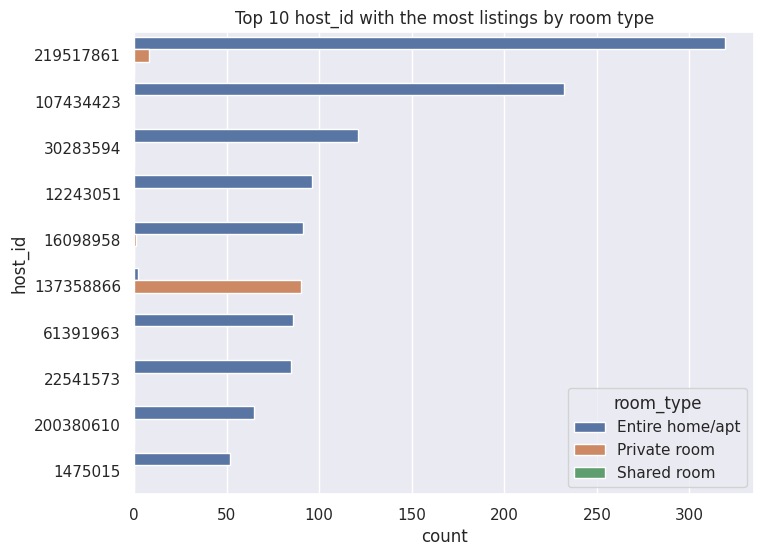

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Top 10 host_id with the most listings by room type')
sns.countplot(y = df['host_id'], order=df['host_id'].value_counts().index[:10], 
              hue=df['room_type']) 


<Axes: title={'center': 'Top 10 host_id with the most listings by neighbourhood group'}, xlabel='count', ylabel='host_id'>

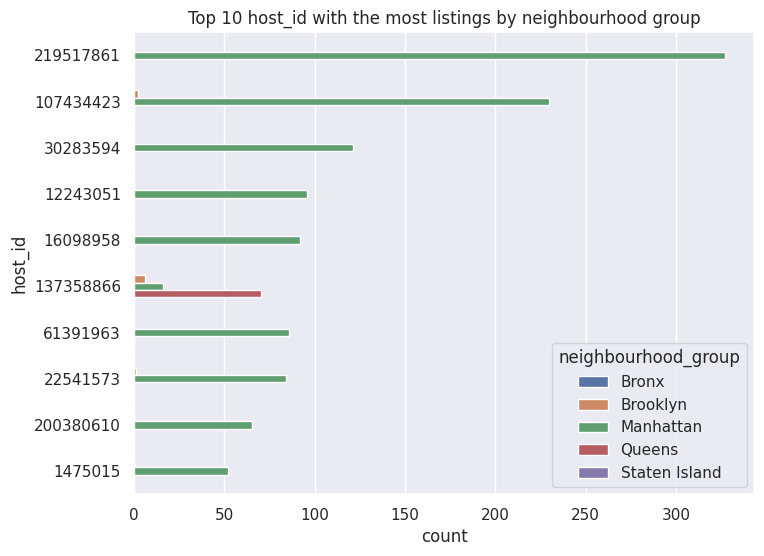

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Top 10 host_id with the most listings by neighbourhood group')
sns.countplot(y = df['host_id'], order=df['host_id'].value_counts().index[:10], 
              hue=df['neighbourhood_group']) 


observation:

Top 10 host id shows that they have listings mostly in Manhattan ,very few in Queens and Brooklyn for entire home/apt and very few for private room.

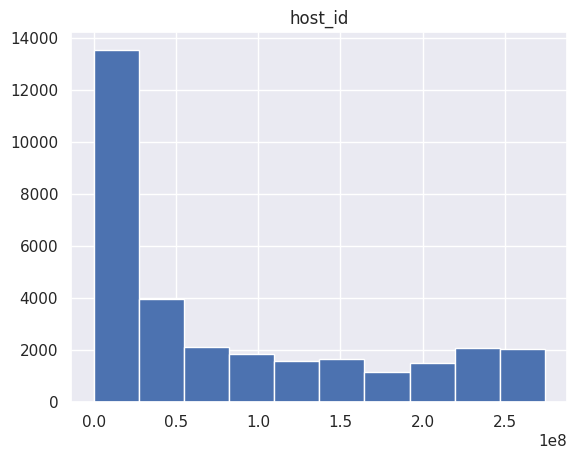

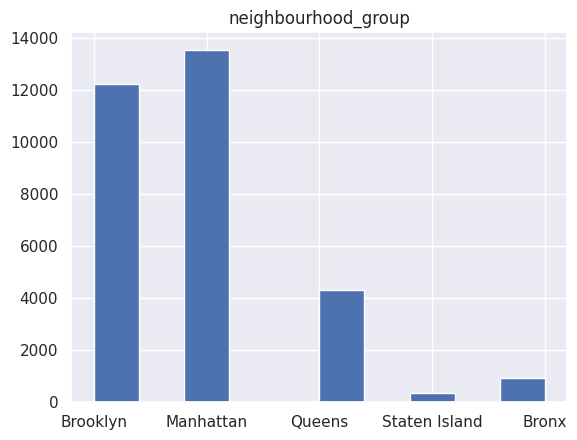

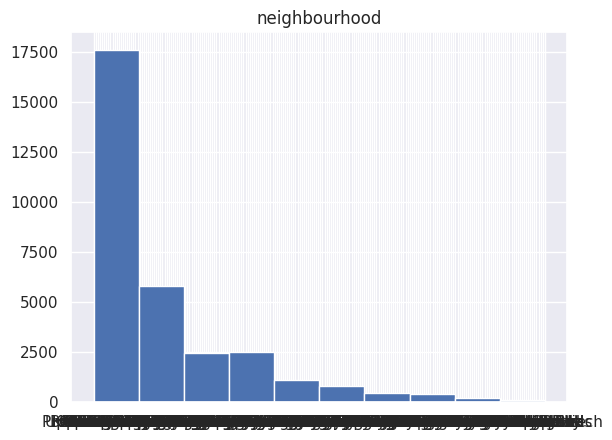

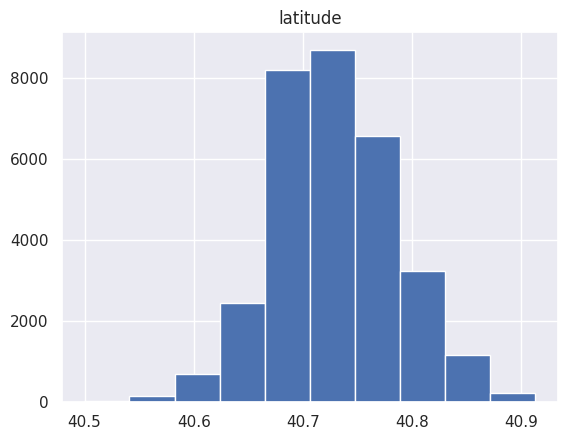

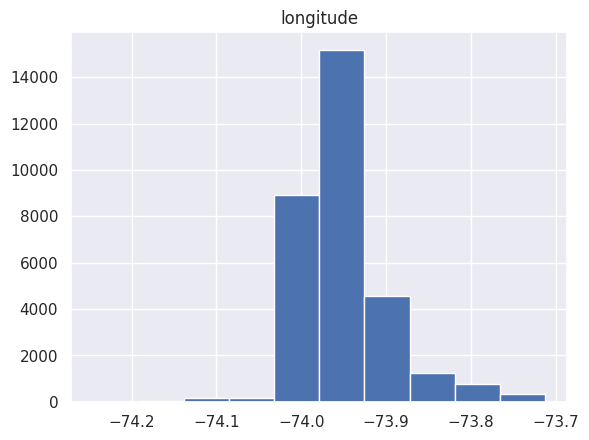

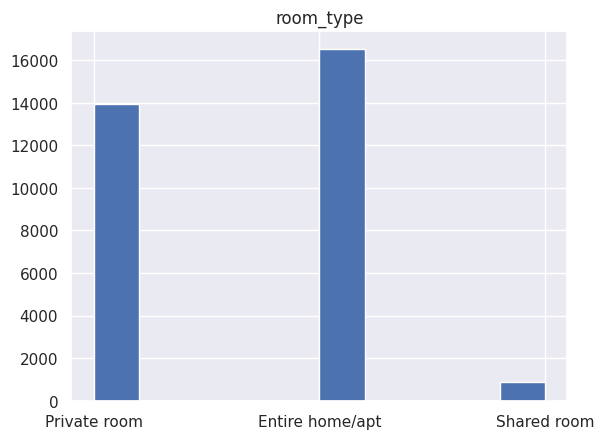

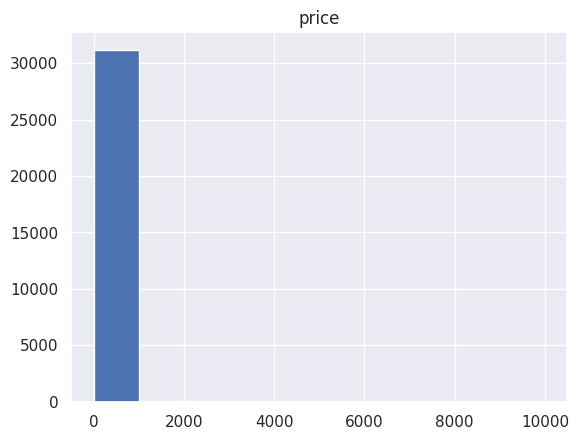

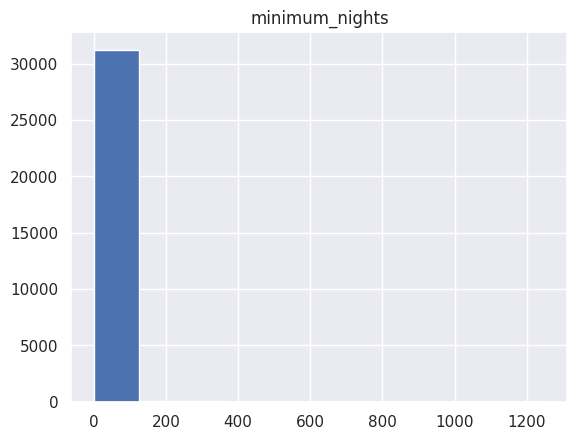

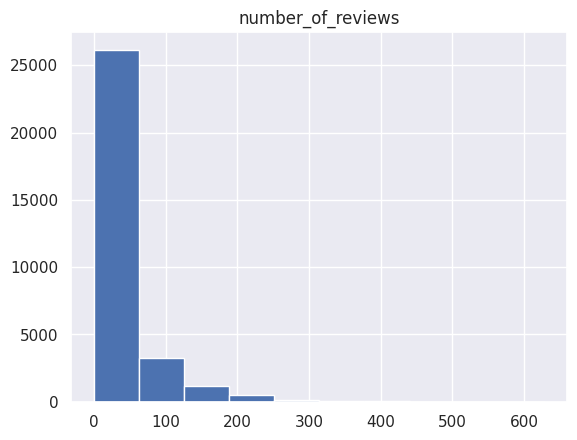

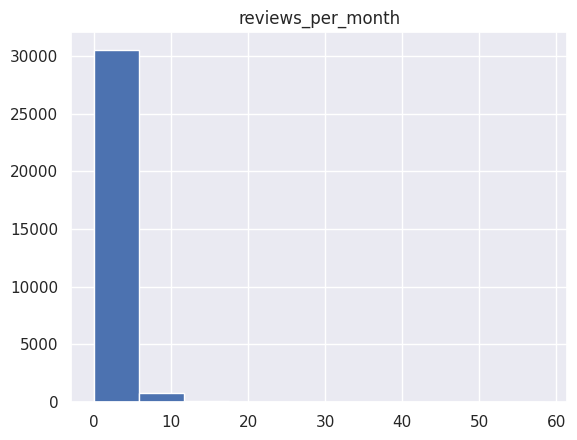

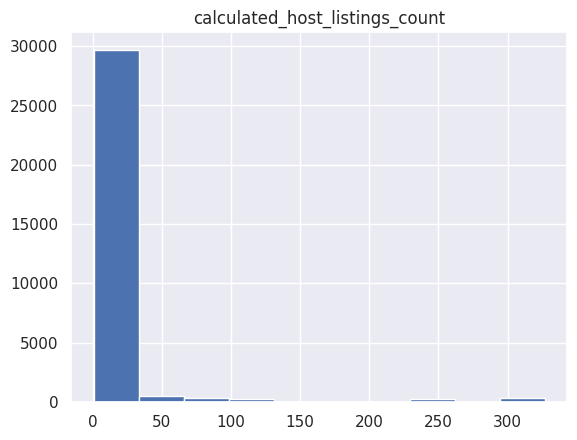

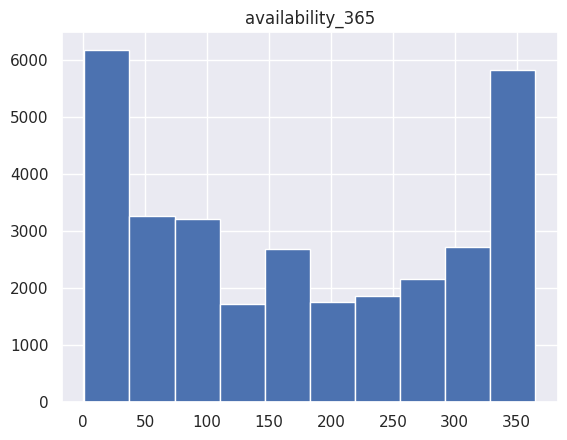

In [ ]:
# Loop through each variable in the DataFrame
for variable in df.columns:
    # Create a histogram for the variable
    df[variable].hist()
    plt.title(variable)
    plt.show()

In [ ]:
sns.pairplot(df)

# visualization:outliers

Outliers are data points that are significantly different from other data points in a dataset. They can be much larger or much smaller than the other data points in the dataset and can distort the overall analysis of the data.

There are different techniques to identify outliers, such as using boxplots, scatterplots, or mathematical methods such as the z-score or the interquartile range (IQR). Once outliers are identified, they can be dealt with by either removing them from the dataset, adjusting them to more reasonable values, or treating them as a separate category in the analysis.

In [ ]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending = False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt    268.215614
Brooklyn             Entire home/apt    187.742052
Staten Island        Entire home/apt    176.776316
Queens               Entire home/apt    155.343871
Bronx                Entire home/apt    131.682390
Manhattan            Private room       127.971560
                     Shared room         84.517857
Brooklyn             Private room        80.756127
Queens               Private room        69.043697
Bronx                Private room        66.822018
Queens               Shared room         65.419753
Staten Island        Shared room         62.125000
Bronx                Shared room         61.200000
Staten Island        Private room        61.070175
Brooklyn             Shared room         47.271242
Name: price, dtype: float64

In [ ]:
df.groupby("neighbourhood_group").agg(minimum_price=("price","min"),maximum_price=("price","max"),average_price=("price","mean"))

,minimum_price,maximum_price,average_price
neighbourhood_group,,,
Bronx,10,2500,89.105148
Brooklyn,10,8000,132.928262
Manhattan,10,10000,214.202080
Queens,10,2600,100.029781
Staten Island,13,5000,114.229607


<Axes: title={'center': 'Price by neighbourhood group'}, xlabel='neighbourhood_group', ylabel='price'>

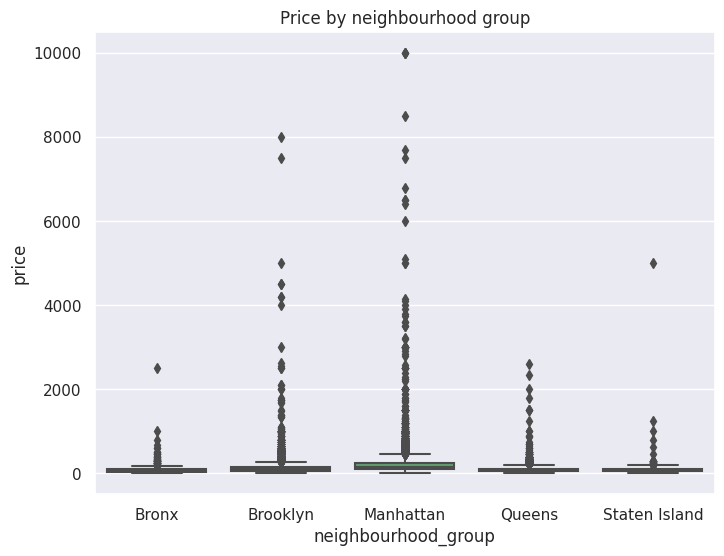

In [ ]:
# price by neighbourhood group
plt.figure(figsize=(8,6))
plt.title('Price by neighbourhood group')
sns.boxplot(data=df, x='neighbourhood_group', y='price')

<Axes: title={'center': 'Price by neighbourhood group'}, xlabel='neighbourhood_group', ylabel='price'>

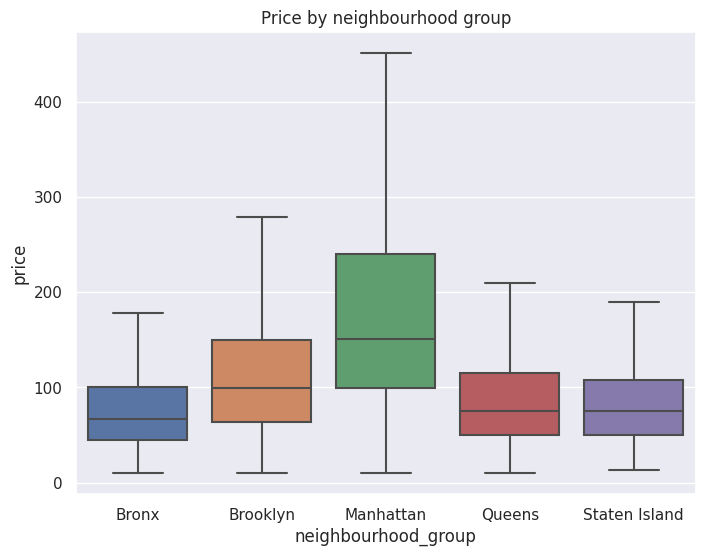

In [ ]:
# without outliers
plt.figure(figsize=(8,6))
plt.title('Price by neighbourhood group')
sns.boxplot(data=df, x='neighbourhood_group', y='price', showfliers=False)

In [ ]:
df.groupby("room_type").agg(minimum_price=("price","min"),maximum_price=("price","max"),average_price=("price","mean"))

,minimum_price,maximum_price,average_price
room_type,,,
Entire home/apt,10,10000,224.613961
Private room,10,9999,93.975000
Shared room,11,1800,66.146172


In [ ]:
#minimum price
min_price=df[df['price']==10]
min_price.groupby(['neighbourhood_group', 'room_type']).size()

neighbourhood_group  room_type      
Bronx                Entire home/apt    0
                     Private room       1
                     Shared room        0
Brooklyn             Entire home/apt    2
                     Private room       1
                     Shared room        0
Manhattan            Entire home/apt    1
                     Private room       1
                     Shared room        0
Queens               Entire home/apt    2
                     Private room       1
                     Shared room        0
Staten Island        Entire home/apt    0
                     Private room       0
                     Shared room        0
dtype: int64

In [ ]:
#higest price
max_price=df[df['price']==10000]
max_price.groupby(['neighbourhood_group','room_type']).size()

neighbourhood_group  room_type      
Bronx                Entire home/apt    0
                     Private room       0
                     Shared room        0
Brooklyn             Entire home/apt    0
                     Private room       0
                     Shared room        0
Manhattan            Entire home/apt    1
                     Private room       0
                     Shared room        0
Queens               Entire home/apt    0
                     Private room       0
                     Shared room        0
Staten Island        Entire home/apt    0
                     Private room       0
                     Shared room        0
dtype: int64

<Axes: title={'center': 'Price by room'}, xlabel='room_type', ylabel='price'>

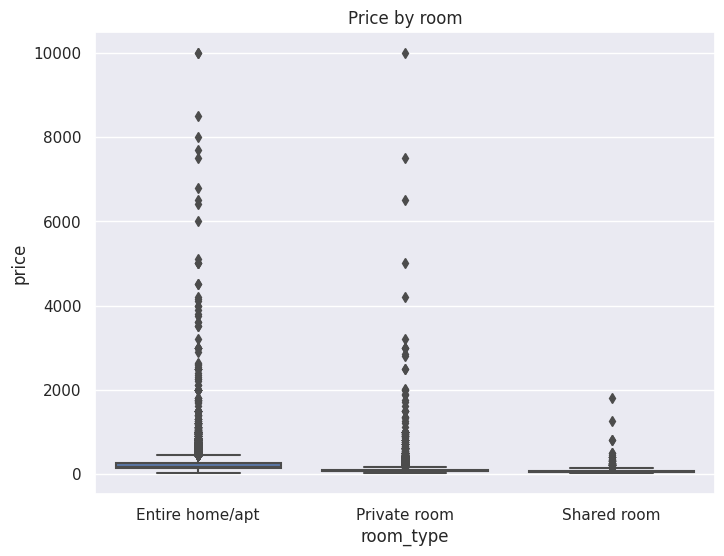

In [ ]:
# price by room_type
plt.figure(figsize=(8,6))
plt.title('Price by room')
sns.boxplot(data=df, x='room_type', y='price')

<Axes: title={'center': 'Price by room'}, xlabel='room_type', ylabel='price'>

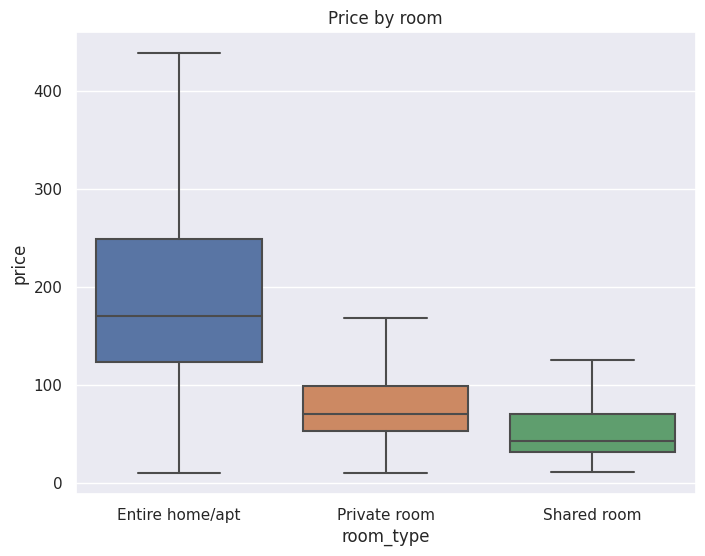

In [ ]:
# price by room_type
plt.figure(figsize=(8,6))
plt.title('Price by room')
sns.boxplot(data=df, x='room_type', y='price',showfliers=False)

In [ ]:
outlier_cols = [
    'price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count'
]

In [ ]:
df[outlier_cols].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,162.091822,8.338426,31.849365,1.509464,10.335460
std,254.444750,23.838961,51.638559,1.781202,40.705488
min,10.000000,1.000000,0.000000,0.000000,1.000000
25%,70.000000,2.000000,2.000000,0.170000,1.000000
50%,112.000000,3.000000,10.000000,0.920000,1.000000
75%,189.000000,5.000000,39.000000,2.340000,3.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000


Box plot will show where the median stands and help understand the amount of outliers in the dataset with points. It will show the trend of prices in different quartiles/parts.

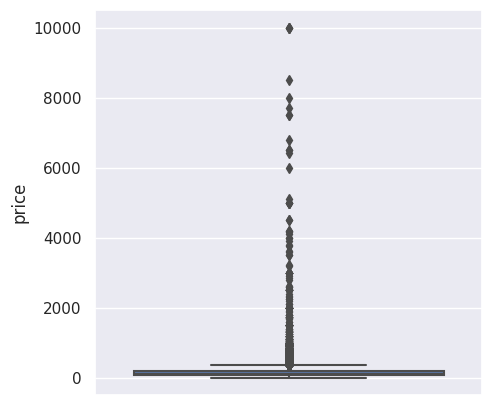

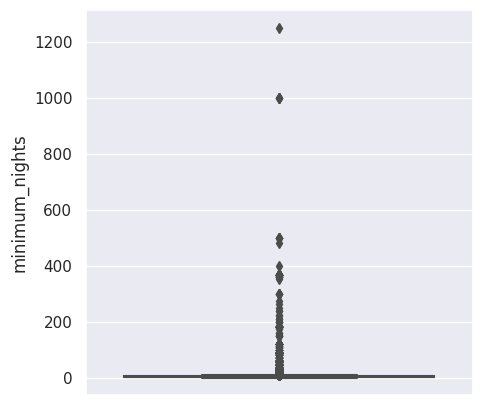

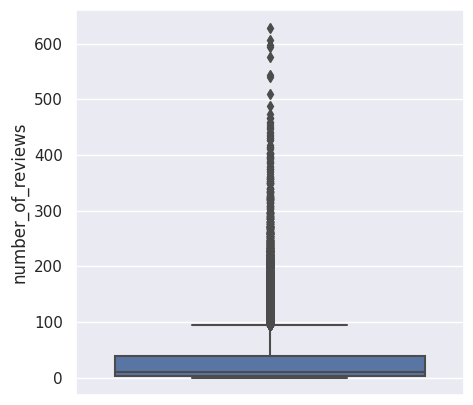

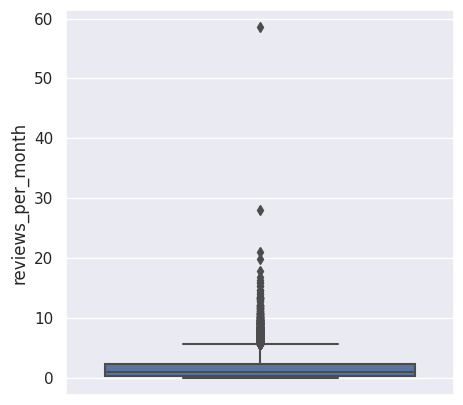

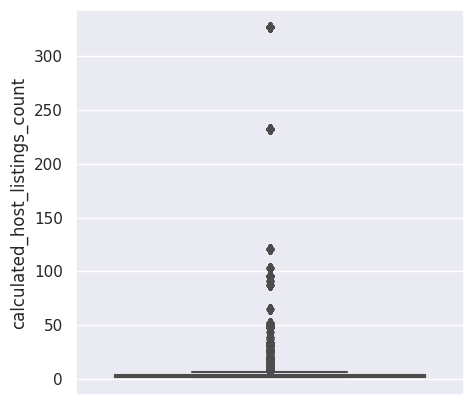

In [ ]:
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[col])
    plt.show()

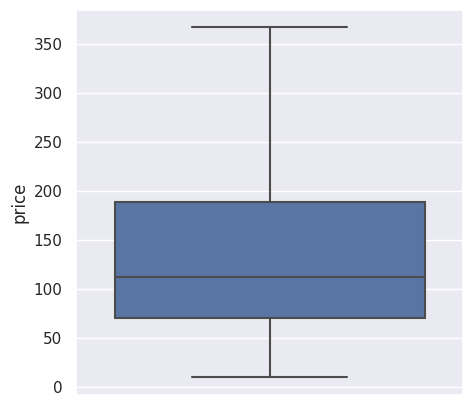

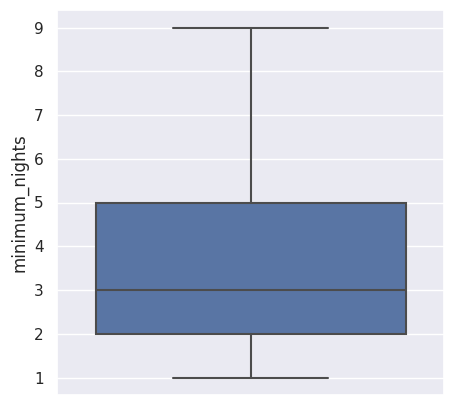

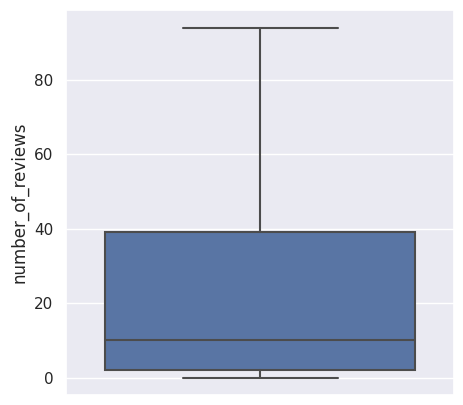

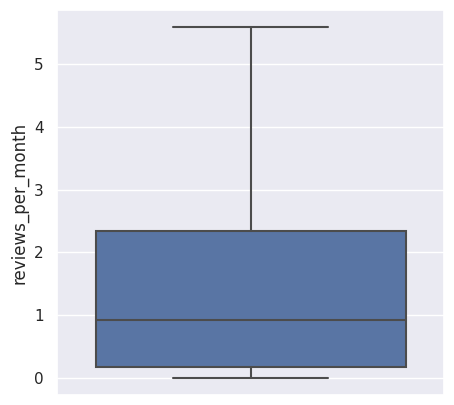

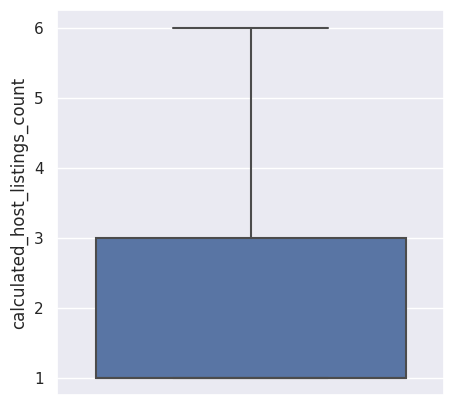

In [ ]:
#without outliers
for col in outlier_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[col],showfliers=False)
    plt.show()

#statistical test 

<ipython-input-126-339d6bab0d5d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="Blues", annot=True)


<Axes: title={'center': 'Heatmap Showing Correlations of Features'}>

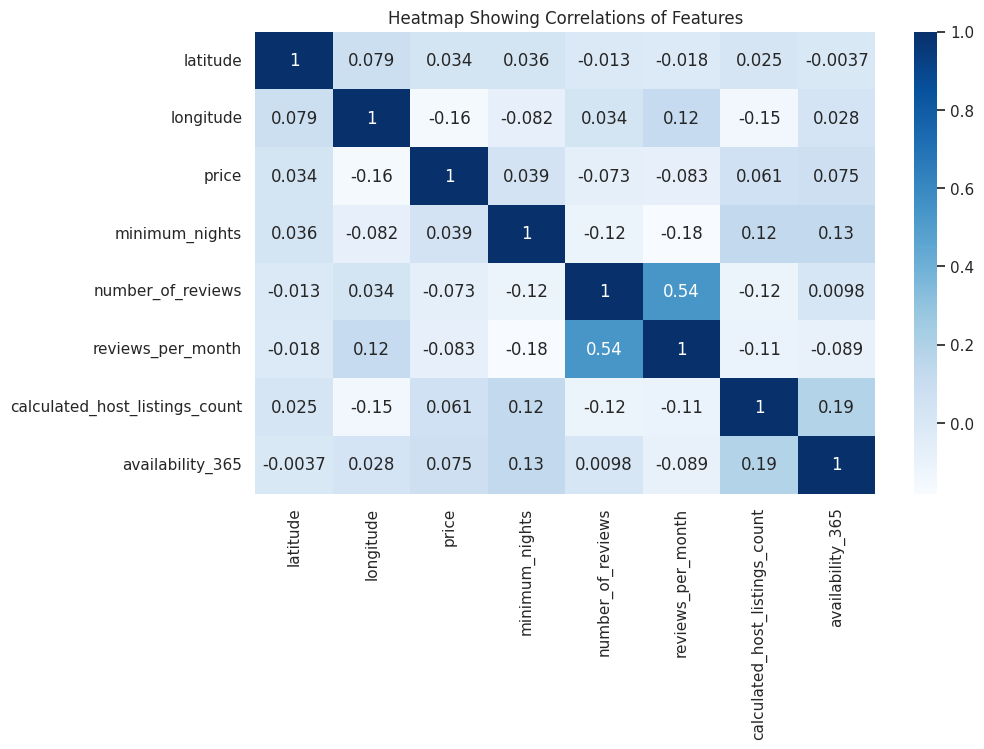

In [ ]:
#correlation between all variables

plt.figure(figsize=(10, 6))
plt.title('Heatmap Showing Correlations of Features')
sns.heatmap(df.corr(), cmap="Blues", annot=True)


Observation:

There was no significant correlation between any feature in the dataset

###pearson's r 

Null hypothesis: There is no correlation between the given variables.

Alternative hypothesis: The correlation between the given variables is nonzero


In [ ]:
#case 1:no correlation
stats.pearsonr(df['availability_365'], df['latitude'])

PearsonRResult(statistic=-0.0033552728316557793, pvalue=0.5665899612439674)

since the p-value is relatively large (0.5665899612439674), we can conclude that there is not enough evidence to reject the null hypothesis of no correlation between availability_365 and latitude.

In [ ]:
#case 2:moderate positive correlation
stats.pearsonr(df['host_id'], df['calculated_host_listings_count'])

PearsonRResult(statistic=-0.01095485049550731, pvalue=0.061325662559406496)

since the p-value is very small, we can conclude that there is a statistically significant positive correlation between host_id and calculated_host_listings_count.

In [ ]:
#case 3: weak negative correlation 
stats.pearsonr(df['reviews_per_month'], df['minimum_nights'])

PearsonRResult(statistic=-0.18081635894713674, pvalue=1.2349656681393882e-228)

since the p-value is very small (0.0), we can conclude that there is a statistically significant negative correlation between reviews_per_month and minimum_nights.

## Linear regression: 

 Null hypothesis: The slope of the regression is zero

 Alternative hypothesis: By default, the slope of the regression is nonzero 


In [ ]:
stats.linregress(df['price'], df['longitude'])

LinregressResult(slope=-3.209101075655729e-05, intercept=-73.94355086683281, rvalue=-0.15886037948158035, pvalue=2.730200925807628e-176, stderr=1.1263796038118696e-06, intercept_stderr=0.0003398118040984959)

<Axes: xlabel='longitude', ylabel='price'>

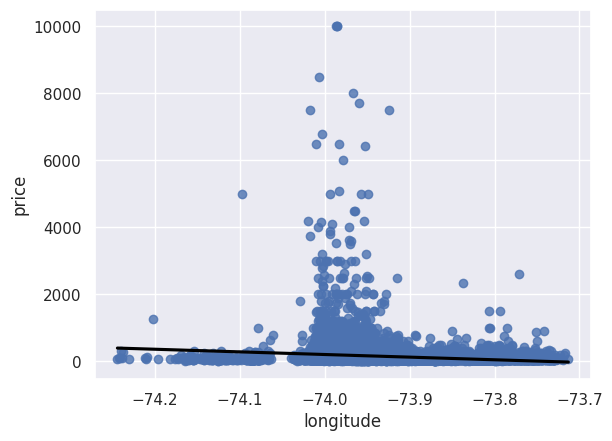

In [ ]:
sns.regplot(df, y='price', x='longitude', line_kws={'color': 'black'})

observation: weak negative correlation 

It is suggesting housing is more expensive to the west (in Manhattan) and gets slightly cheaper to the east.

There is a negative relationship between price and longitude in Airbnb listings in New York City, with a weak correlation (rvalue = -0.25471199071104533). The slope indicates that for every unit increase in longitude, the price decreases by $0.0001100741253278621. The pvalue of 0.0 suggests that this relationship is statistically significant.

##t-test:

 Null hypothesis: The means of the two groups is the same.

Alternative hypothesis: The means of the two groups are different

In [ ]:
df.groupby('neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx             86.305396
Brooklyn         124.991104
Manhattan        186.825661
Queens            97.486039
Staten Island     94.111111
Name: price, dtype: float64

In [ ]:
stats.ttest_ind(df[df.neighbourhood_group == "Manhattan"].price, df[df.neighbourhood_group == "Brooklyn"].price)

Ttest_indResult(statistic=40.26798772309025, pvalue=0.0)

observation:

mean price of manhattan is 214.202080 and mean price of brooklyn is 132.928262 .The difference is statistically significant at p<0.05

##chi-squared test

Null hypothesis: There is no relationship between the categorical variables.

Alternative hypothesis: There is a relationship between the categorical variables.

In [ ]:
# With the contingency table, we can perform a chi-squared test.

table = pd.crosstab(df['room_type'], df['neighbourhood_group'])
table

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,318,6071,8441,1550,152
Private room,545,5876,4782,2586,171
Shared room,50,306,336,162,8


In [ ]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=1169.6780660470788, pvalue=3.410535851841281e-247, dof=8, expected_freq=array([[ 481.39682337, 6460.63009504, 7149.24373286, 2266.20322766,
         174.52612107],
       [ 406.50251961, 5455.50424188, 6036.98539261, 1913.63398609,
         147.37385979],
       [  25.10065701,  336.86566307,  372.77087453,  118.16278625,
           9.10001914]]))

From the p value, we can reject the null hypothesis. From the statistic, which
is quite large, we can say that there is a very strong relationship between
room_type and neighbourhood_group.

# Data Preprocessing


In [ ]:
#copy of dataframe
airbnb_df=df.copy()

In [ ]:
# processing categorical columns using LabelEncoder.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
airbnb_df['neighbourhood_group'] = le.fit_transform(airbnb_df['neighbourhood_group'])
airbnb_df['neighbourhood'] = le.fit_transform(airbnb_df['neighbourhood'])
airbnb_df['room_type'] = le.fit_transform(airbnb_df['room_type'])


In [ ]:
airbnb_df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,1,107,40.64749,-73.97237,1,149,1,9,0.21,6,365
1,2845,2,126,40.75362,-73.98377,0,225,1,45,0.38,2,355
2,4632,2,93,40.80902,-73.94190,1,150,3,0,0.00,1,365
3,4869,1,40,40.68514,-73.95976,0,89,1,270,4.64,1,194
5,7322,2,136,40.74767,-73.97500,0,200,3,74,0.59,1,129


In [ ]:
#import library for normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# K-mean clustering


The K-means clustering analysis on the Airbnb dataset aims to identify distinct clusters of properties based on various features such as price, location, availability, and room type. K-means clustering relies on mathematical algorithms to group similar data points together. The clusters generated by K-means clustering provide insights into property patterns and trends.

In [ ]:
from sklearn.cluster import KMeans

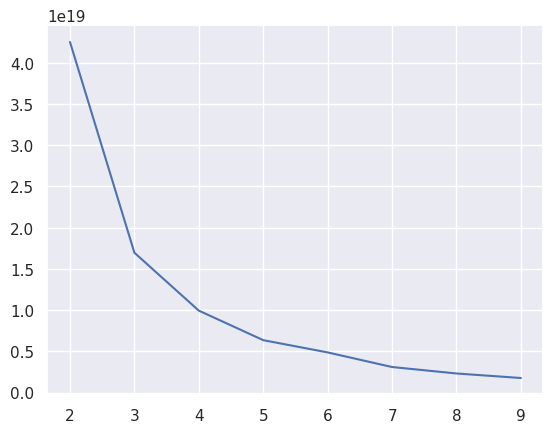

In [ ]:
#elbow
inertias = []
ks = []
for i in range(2, 10):
  ks.append(i)
  # Note: Set n_init to avoid deprecation warnings
  kmeans = KMeans(n_clusters = i, n_init='auto')
  kmeans.fit(airbnb_df)
  kmeans.inertia_
  inertias.append(kmeans.inertia_)

plt.plot(ks, inertias)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


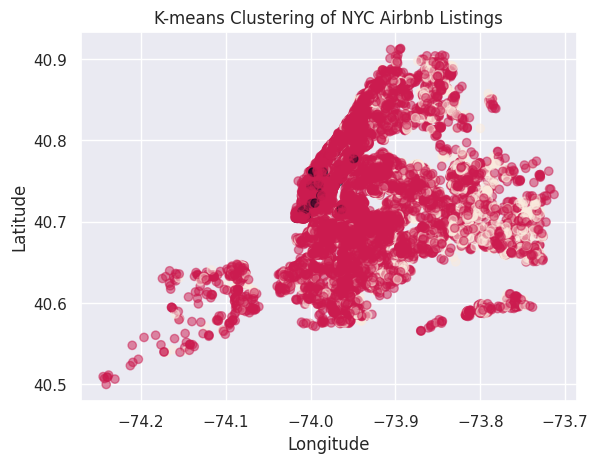

In [ ]:
# Feature selection
X = airbnb_df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

# Normalize the data

X_scaled = scaler.fit_transform(X)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
airbnb_df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(airbnb_df['longitude'], airbnb_df['latitude'], c=airbnb_df['cluster'], alpha=0.5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering of NYC Airbnb Listings')
plt.show()

# linear regression


The goal of this dataset is to analyze the characteristics of the Airbnb listings in New York City and make predictions about the prices of the listings based on these features

In [ ]:
# Split the data 
from sklearn.model_selection import train_test_split
  

# X for the training dataset , y for the test dataset 

X = airbnb_df.drop('price',axis= 1)
X_scaled = scaler.fit_transform(X)
y = airbnb_df.price 

# split the data to traing and test datasets 
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.1, random_state = 300)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Linear Regression 
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred=lin_reg.predict(x_test)

# Calculate the accuracy score for linear regression 
r2_score(y_test,y_pred)

0.12400469735546871